# Dataset -1 Commodity - Cleaning

In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import gaussian_kde

In [2]:
commodity_file = 'CMO-Historical-Data-Monthly.xlsx'
macro_file = 'economic_indicators_dataset_2010_2023.csv'

In [3]:
commodity_df = pd.read_excel(commodity_file, sheet_name='Monthly Prices')
commodity_df = pd.DataFrame(commodity_df)
commodity_df

,World Bank Commodity Price Data (The Pink Sheet),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71
0,"monthly prices in nominal US dollars, 1960 to ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(monthly series are available only in nominal ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Updated on January 03, 2025",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,"Crude oil, average","Crude oil, Brent","Crude oil, Dubai","Crude oil, WTI","Coal, Australian","Coal, South African **","Natural gas, US","Natural gas, Europe","Liquefied natural gas, Japan",...,Aluminum,"Iron ore, cfr spot",Copper,Lead,Tin,Nickel,Zinc,Gold,Platinum,Silver
4,NaN,($/bbl),($/bbl),($/bbl),($/bbl),($/mt),($/mt),($/mmbtu),($/mmbtu),($/mmbtu),...,($/mt),($/dmtu),($/mt),($/mt),($/mt),($/mt),($/mt),($/troy oz),($/troy oz),($/troy oz)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,2024M08,78.121,80.863,77.95,75.55,145.76,106.21,1.9903,12.374598,13.319637,...,2343.67,99.91,8971.96,1994.63,31491.65,16292.12,2714.08,2470.15,945.36,28.53
781,2024M09,72.424333,74.293,73.43,69.55,139.2,106.07,2.2508,11.784259,12.969226,...,2449.92,92.83,9237.48,2000.31,31471.69,16076.74,2837.02,2570.55,966.7,30.131
782,2024M10,73.970667,75.662,74.65,71.6,146.63,106.81,2.2077,12.920133,12.54098,...,2595.58,101.39,9533.99,2034,32012.43,16765.8,3105.77,2690.08,998.91,32.416
783,2024M11,72.291667,74.395,72.79,69.69,142.12,106.82,2.1045,13.9264,12.822731,...,2582.19,100.5,9075.73,1987.53,29654.89,15723.06,3004.2,2651.13,965.53,31.094


In [4]:
commodity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 72 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   World Bank Commodity Price Data (The Pink Sheet)  783 non-null    object
 1   Unnamed: 1                                        782 non-null    object
 2   Unnamed: 2                                        782 non-null    object
 3   Unnamed: 3                                        782 non-null    object
 4   Unnamed: 4                                        782 non-null    object
 5   Unnamed: 5                                        782 non-null    object
 6   Unnamed: 6                                        782 non-null    object
 7   Unnamed: 7                                        782 non-null    object
 8   Unnamed: 8                                        782 non-null    object
 9   Unnamed: 9                      

In [5]:
commodity_df.iloc[4, :]

World Bank Commodity Price Data (The Pink Sheet)            NaN
Unnamed: 1                                              ($/bbl)
Unnamed: 2                                              ($/bbl)
Unnamed: 3                                              ($/bbl)
Unnamed: 4                                              ($/bbl)
                                                       ...     
Unnamed: 67                                              ($/mt)
Unnamed: 68                                              ($/mt)
Unnamed: 69                                         ($/troy oz)
Unnamed: 70                                         ($/troy oz)
Unnamed: 71                                         ($/troy oz)
Name: 4, Length: 72, dtype: object

In [6]:
new_headers = commodity_df.iloc[3:5, :].apply(lambda col: f"{col.iloc[0]} {col.iloc[1]}", axis=0)
new_headers

World Bank Commodity Price Data (The Pink Sheet)                       nan nan
Unnamed: 1                                          Crude oil, average ($/bbl)
Unnamed: 2                                            Crude oil, Brent ($/bbl)
Unnamed: 3                                            Crude oil, Dubai ($/bbl)
Unnamed: 4                                              Crude oil, WTI ($/bbl)
                                                               ...            
Unnamed: 67                                                      Nickel ($/mt)
Unnamed: 68                                                        Zinc ($/mt)
Unnamed: 69                                                   Gold ($/troy oz)
Unnamed: 70                                               Platinum ($/troy oz)
Unnamed: 71                                                 Silver ($/troy oz)
Length: 72, dtype: object

In [7]:
commodity_df.columns = new_headers
commodity_df

,nan nan,"Crude oil, average ($/bbl)","Crude oil, Brent ($/bbl)","Crude oil, Dubai ($/bbl)","Crude oil, WTI ($/bbl)","Coal, Australian ($/mt)","Coal, South African ** ($/mt)","Natural gas, US ($/mmbtu)","Natural gas, Europe ($/mmbtu)","Liquefied natural gas, Japan ($/mmbtu)",...,Aluminum ($/mt),"Iron ore, cfr spot ($/dmtu)",Copper ($/mt),Lead ($/mt),Tin ($/mt),Nickel ($/mt),Zinc ($/mt),Gold ($/troy oz),Platinum ($/troy oz),Silver ($/troy oz)
0,"monthly prices in nominal US dollars, 1960 to ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(monthly series are available only in nominal ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Updated on January 03, 2025",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,"Crude oil, average","Crude oil, Brent","Crude oil, Dubai","Crude oil, WTI","Coal, Australian","Coal, South African **","Natural gas, US","Natural gas, Europe","Liquefied natural gas, Japan",...,Aluminum,"Iron ore, cfr spot",Copper,Lead,Tin,Nickel,Zinc,Gold,Platinum,Silver
4,NaN,($/bbl),($/bbl),($/bbl),($/bbl),($/mt),($/mt),($/mmbtu),($/mmbtu),($/mmbtu),...,($/mt),($/dmtu),($/mt),($/mt),($/mt),($/mt),($/mt),($/troy oz),($/troy oz),($/troy oz)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,2024M08,78.121,80.863,77.95,75.55,145.76,106.21,1.9903,12.374598,13.319637,...,2343.67,99.91,8971.96,1994.63,31491.65,16292.12,2714.08,2470.15,945.36,28.53
781,2024M09,72.424333,74.293,73.43,69.55,139.2,106.07,2.2508,11.784259,12.969226,...,2449.92,92.83,9237.48,2000.31,31471.69,16076.74,2837.02,2570.55,966.7,30.131
782,2024M10,73.970667,75.662,74.65,71.6,146.63,106.81,2.2077,12.920133,12.54098,...,2595.58,101.39,9533.99,2034,32012.43,16765.8,3105.77,2690.08,998.91,32.416
783,2024M11,72.291667,74.395,72.79,69.69,142.12,106.82,2.1045,13.9264,12.822731,...,2582.19,100.5,9075.73,1987.53,29654.89,15723.06,3004.2,2651.13,965.53,31.094


In [8]:
commodity_df.iloc[0, 0]

'monthly prices in nominal US dollars, 1960 to present'

In [9]:
commodity_df.iloc[1, 0]

'(monthly series are available only in nominal US dollars)'

In [10]:
commodity_df.iloc[2, 0]

'Updated on January 03, 2025'

In [11]:
commodity_df = commodity_df.drop([0, 1, 2, 3, 4], axis=0).reset_index(drop=True)

In [12]:
first_col = commodity_df.columns[0]

commodity_df[first_col] = pd.to_datetime(commodity_df[first_col], format='%YM%m')
commodity_df = commodity_df.rename(columns={first_col: 'Date'})
commodity_df

,Date,"Crude oil, average ($/bbl)","Crude oil, Brent ($/bbl)","Crude oil, Dubai ($/bbl)","Crude oil, WTI ($/bbl)","Coal, Australian ($/mt)","Coal, South African ** ($/mt)","Natural gas, US ($/mmbtu)","Natural gas, Europe ($/mmbtu)","Liquefied natural gas, Japan ($/mmbtu)",...,Aluminum ($/mt),"Iron ore, cfr spot ($/dmtu)",Copper ($/mt),Lead ($/mt),Tin ($/mt),Nickel ($/mt),Zinc ($/mt),Gold ($/troy oz),Platinum ($/troy oz),Silver ($/troy oz)
0,1960-01-01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,715.4,206.1,2180.4,1631,260.8,35.27,83.5,0.9137
1,1960-02-01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,728.19,203.7,2180.4,1631,244.9,35.27,83.5,0.9137
2,1960-03-01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,684.94,210.3,2173.8,1631,248.7,35.27,83.5,0.9137
3,1960-04-01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,723.11,213.6,2178.2,1631,254.6,35.27,83.5,0.9137
4,1960-05-01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,684.75,213.4,2162.7,1631,253.8,35.27,83.5,0.9137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,2024-08-01,78.121,80.863,77.95,75.55,145.76,106.21,1.9903,12.374598,13.319637,...,2343.67,99.91,8971.96,1994.63,31491.65,16292.12,2714.08,2470.15,945.36,28.53
776,2024-09-01,72.424333,74.293,73.43,69.55,139.2,106.07,2.2508,11.784259,12.969226,...,2449.92,92.83,9237.48,2000.31,31471.69,16076.74,2837.02,2570.55,966.7,30.131
777,2024-10-01,73.970667,75.662,74.65,71.6,146.63,106.81,2.2077,12.920133,12.54098,...,2595.58,101.39,9533.99,2034,32012.43,16765.8,3105.77,2690.08,998.91,32.416
778,2024-11-01,72.291667,74.395,72.79,69.69,142.12,106.82,2.1045,13.9264,12.822731,...,2582.19,100.5,9075.73,1987.53,29654.89,15723.06,3004.2,2651.13,965.53,31.094


In [13]:
commodity_df.isnull().sum().sum()

0

In [14]:
for col in commodity_df.columns[1:]:
    # get the unique values for this column
    unique_vals = commodity_df[col].unique()
    # print values which are not int or float
    for val in unique_vals:
        if not isinstance(val, (int, float)):
            print(val)

…
…
…
…
…
…
…
…
…
…
...
...
…
…
…
…
...
…
…
…
…
…
…
…
…
...


In [15]:
count_special = ((commodity_df == "…") | (commodity_df == "...")).sum().sum()
print("Number of '…', or '...' values in the dataset:", count_special)

Number of '…', or '...' values in the dataset: 6367


In [16]:
commodity_df.size

56160

In [17]:
commodity_df = commodity_df.replace(["…", "..."], np.nan)

In [18]:
null_count = commodity_df.isnull().sum().sum()
print("Number of null values in the DataFrame:", null_count)

Number of null values in the DataFrame: 6367


In [19]:
null_cols = commodity_df.columns[commodity_df.isnull().any()]
print("Columns with null values:")
for col in null_cols:
    print(f'{col}:{commodity_df[col].isnull().sum()}')


Columns with null values:
Crude oil, WTI ($/bbl):264
Coal, Australian ($/mt):120
Coal, South African ** ($/mt):288
Liquefied natural gas, Japan ($/mmbtu):204
Natural gas index (2010=100):204
Groundnuts ($/mt):240
Fish meal ($/mt):228
Palm kernel oil ($/mt):432
Rapeseed oil ($/mt):505
Sunflower oil ($/mt):510
Barley ($/mt):52
Sorghum ($/mt):52
Rice, Thai 25%  ($/mt):320
Rice, Thai A.1 ($/mt):312
Rice, Viet Namese 5% ($/mt):538
Wheat, US SRW ($/mt):235
Banana, Europe ($/kg):444
Lamb ** ($/kg):132
Shrimps, Mexican ($/kg):14
Logs, Cameroon ($/cubic meter):120
Sawnwood, Cameroon ($/cubic meter):372
Plywood (cents/sheet):228
Rubber, TSR20 ** ($/kg):468
Phosphate rock ($/mt):1
DAP ($/mt):84


In [20]:
commodity_df = commodity_df.fillna(method='ffill').fillna(method='bfill')

In [21]:
commodity_df.isnull().sum().sum()

0

In [22]:
commodity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 72 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Date                                    780 non-null    datetime64[ns]
 1   Crude oil, average ($/bbl)              780 non-null    float64       
 2   Crude oil, Brent ($/bbl)                780 non-null    float64       
 3   Crude oil, Dubai ($/bbl)                780 non-null    float64       
 4   Crude oil, WTI ($/bbl)                  780 non-null    float64       
 5   Coal, Australian ($/mt)                 780 non-null    float64       
 6   Coal, South African ** ($/mt)           780 non-null    float64       
 7   Natural gas, US ($/mmbtu)               780 non-null    float64       
 8   Natural gas, Europe ($/mmbtu)           780 non-null    float64       
 9   Liquefied natural gas, Japan ($/mmbtu)  780 non-null  

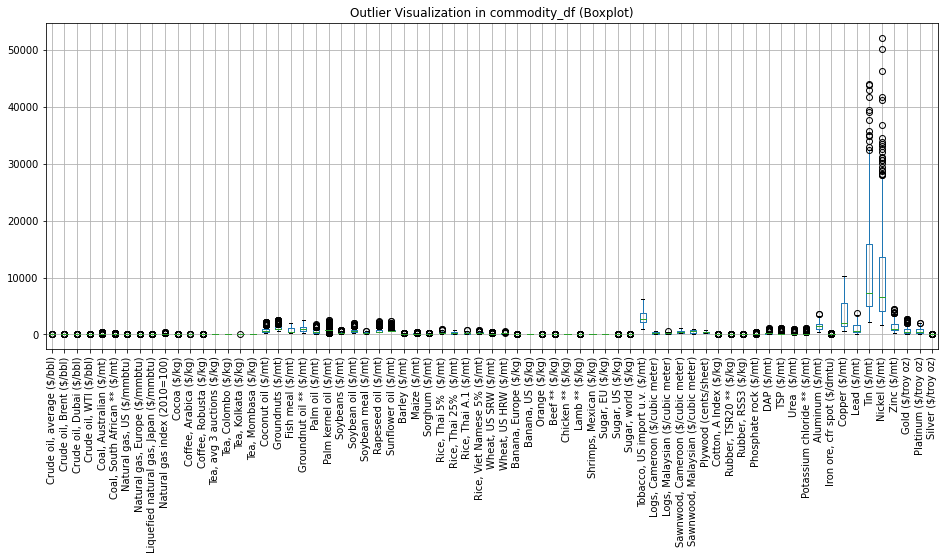

In [23]:
# For commodity_df: Show all numeric columns as boxplots
plt.figure(figsize=(16, 6))
commodity_df.boxplot()
plt.title("Outlier Visualization in commodity_df (Boxplot)")
plt.xticks(rotation=90)
plt.show()

In [67]:
commodity_df.describe()

,Date,"Crude oil, average ($/bbl)","Crude oil, Brent ($/bbl)","Crude oil, Dubai ($/bbl)","Crude oil, WTI ($/bbl)","Coal, Australian ($/mt)","Coal, South African ** ($/mt)","Natural gas, US ($/mmbtu)","Natural gas, Europe ($/mmbtu)","Liquefied natural gas, Japan ($/mmbtu)",...,Aluminum ($/mt),"Iron ore, cfr spot ($/dmtu)",Copper ($/mt),Lead ($/mt),Tin ($/mt),Nickel ($/mt),Zinc ($/mt),Gold ($/troy oz),Platinum ($/troy oz),Silver ($/troy oz)
count,780,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,...,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,1992-06-16 02:05:32.307692288,33.412984,34.230560,32.763726,42.365665,50.063299,48.981480,2.399592,4.782296,6.033872,...,1439.890942,48.291722,3297.591213,955.640187,10858.891262,9268.946069,1271.750882,581.009694,585.119476,9.407922
min,1960-01-01 00:00:00,1.210000,1.210000,1.210000,11.310000,7.800000,21.250000,0.140000,0.384150,2.720000,...,496.039490,8.770000,606.710000,140.700000,2162.700000,1631.000000,176.600000,34.940000,78.500000,0.913700
25%,1976-03-24 06:00:00,11.510000,11.510000,10.600000,28.153095,24.900000,29.340000,0.547500,1.735113,2.771163,...,903.894287,21.450000,1404.605000,400.375000,4934.997750,4070.075000,685.825000,149.980000,163.420000,4.086030
50%,1992-06-16 00:00:00,22.140833,22.565000,20.835000,35.300000,33.800000,29.340000,2.100000,3.020000,4.000000,...,1455.580000,29.000000,1960.790000,601.150000,7227.600000,6618.100000,1000.900000,373.980000,429.770000,5.469100
75%,2008-09-08 12:00:00,52.857500,54.127273,51.482625,50.940000,59.005000,58.680000,3.024675,5.857080,7.606942,...,1860.980114,65.837500,5492.452500,1721.457500,15913.535000,13558.695000,1869.627500,889.746250,908.675000,14.898250
max,2024-12-01 00:00:00,132.825184,133.873043,131.224783,133.927143,430.810000,302.000000,13.522619,70.043640,23.733791,...,3577.860000,214.430000,10230.890000,3719.717000,43983.350000,52179.048000,4405.395000,2690.080000,2052.450000,42.695200
std,NaN,31.357458,32.522904,31.653220,23.799758,53.710897,37.734208,2.175583,6.192197,4.266672,...,656.931976,45.714876,2664.797553,765.542876,8062.512691,7607.417461,908.269593,586.327299,457.985321,8.478569


# Dataset -2 macro - Cleaning

In [24]:
macro_df = pd.read_csv(macro_file)
macro_df.head()

,Date,Country,Inflation Rate (%),GDP Growth Rate (%),Unemployment Rate (%),Interest Rate (%),Stock Index Value
0,2010-01-31,Brazil,1.23,0.69,10.48,7.71,21748.85
1,2010-01-31,France,6.76,2.59,4.27,7.39,10039.56
2,2010-01-31,USA,7.46,4.84,2.64,6.39,13129.10
3,2010-02-28,Brazil,5.43,0.31,8.26,6.09,23304.58
4,2010-02-28,Canada,0.69,-0.52,11.92,-0.51,16413.03


In [25]:
macro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   500 non-null    object 
 1   Country                500 non-null    object 
 2   Inflation Rate (%)     500 non-null    float64
 3   GDP Growth Rate (%)    500 non-null    float64
 4   Unemployment Rate (%)  500 non-null    float64
 5   Interest Rate (%)      500 non-null    float64
 6   Stock Index Value      500 non-null    float64
dtypes: float64(5), object(2)
memory usage: 27.5+ KB


In [26]:
col_name = macro_df.columns[0]
macro_df[col_name] = pd.to_datetime(macro_df[col_name])

macro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   500 non-null    datetime64[ns]
 1   Country                500 non-null    object        
 2   Inflation Rate (%)     500 non-null    float64       
 3   GDP Growth Rate (%)    500 non-null    float64       
 4   Unemployment Rate (%)  500 non-null    float64       
 5   Interest Rate (%)      500 non-null    float64       
 6   Stock Index Value      500 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 27.5+ KB


In [27]:
macro_df.iloc[:, 0].min()

Timestamp('2010-01-31 00:00:00')

In [28]:
macro_df.iloc[:, 0].max()

Timestamp('2023-11-30 00:00:00')

In [29]:
macro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   500 non-null    datetime64[ns]
 1   Country                500 non-null    object        
 2   Inflation Rate (%)     500 non-null    float64       
 3   GDP Growth Rate (%)    500 non-null    float64       
 4   Unemployment Rate (%)  500 non-null    float64       
 5   Interest Rate (%)      500 non-null    float64       
 6   Stock Index Value      500 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 27.5+ KB


In [30]:
macro_df.Country.unique()

array(['Brazil', 'France', 'USA', 'Canada', 'Japan', 'Germany', 'China',
       'UK', 'India', 'Australia'], dtype=object)

In [66]:
macro_df.describe()

,Date,Inflation Rate (%),GDP Growth Rate (%),Unemployment Rate (%),Interest Rate (%),Stock Index Value
count,500,500.00000,500.000000,500.000000,500.000000,500.000000
mean,2017-03-21 19:26:24.000000256,5.08514,2.414780,6.906720,4.698180,20926.226540
min,2010-01-31 00:00:00,0.00000,-5.000000,2.000000,-0.980000,1017.270000
25%,2013-10-31 00:00:00,2.52500,-1.170000,4.257500,2.027500,11587.862500
50%,2017-08-31 00:00:00,5.20500,2.580000,6.865000,4.975000,20996.210000
75%,2020-09-30 00:00:00,7.71000,5.445000,9.502500,7.352500,30824.847500
max,2023-11-30 00:00:00,9.99000,9.930000,11.970000,10.000000,39982.210000
std,NaN,2.95633,4.074762,2.982406,3.152877,11066.259233


## Analysis:  USA

In [31]:
# Check date ranges for both dataframes
print("Commodity DataFrame:")
print(f"  Start: {commodity_df['Date'].min()}")
print(f"  End: {commodity_df['Date'].max()}")
print(f"  Count: {len(commodity_df)}")
print(f"  Frequency: {commodity_df['Date'].diff().mode()[0]}")

print("\nMacro DataFrame:")
print(f"  Start: {macro_df['Date'].min()}")
print(f"  End: {macro_df['Date'].max()}")
print(f"  Count: {len(macro_df)}")
print(f"  Unique countries: {macro_df['Country'].nunique()}")

# Find overlapping date range
overlap_start = max(commodity_df['Date'].min(), macro_df['Date'].min())
overlap_end = min(commodity_df['Date'].max(), macro_df['Date'].max())

print(f"\nOverlapping Period:")
print(f"  Start: {overlap_start}")
print(f"  End: {overlap_end}")


Commodity DataFrame:
  Start: 1960-01-01 00:00:00
  End: 2024-12-01 00:00:00
  Count: 780
  Frequency: 31 days 00:00:00

Macro DataFrame:
  Start: 2010-01-31 00:00:00
  End: 2023-11-30 00:00:00
  Count: 500
  Unique countries: 10

Overlapping Period:
  Start: 2010-01-31 00:00:00
  End: 2023-11-30 00:00:00


In [32]:
# Filter USA data
USA_macro = macro_df[macro_df['Country'] == 'USA'].copy()

# Filter both dataframes to overlapping period
USA_macro_filtered = USA_macro[
    (USA_macro['Date'] >= overlap_start) & 
    (USA_macro['Date'] <= overlap_end)
].sort_values('Date').reset_index(drop=True)

commodity_filtered = commodity_df[
    (commodity_df['Date'] >= overlap_start) & 
    (commodity_df['Date'] <= overlap_end)
].sort_values('Date').reset_index(drop=True)

print(f"USA macro data: {len(USA_macro_filtered)} records")
print(f"Commodity data: {len(commodity_filtered)} records")


USA macro data: 57 records
Commodity data: 166 records


In [33]:
USA_macro_filtered.set_index('Date', inplace=True)
commodity_filtered.set_index('Date', inplace=True)
print("USA macro dates sample:", USA_macro_filtered.index[:5])
print("Commodity dates sample:", commodity_filtered.index[:5])

USA macro dates sample: DatetimeIndex(['2010-01-31', '2010-02-28', '2010-03-31', '2010-06-30',
               '2011-01-31'],
              dtype='datetime64[ns]', name='Date', freq=None)
Commodity dates sample: DatetimeIndex(['2010-02-01', '2010-03-01', '2010-04-01', '2010-05-01',
               '2010-06-01'],
              dtype='datetime64[ns]', name='Date', freq=None)


In [34]:
print("Duplicate dates found:", USA_macro_filtered.index.duplicated().sum())
print("\nDuplicate dates:")
USA_macro_filtered[USA_macro_filtered.index.duplicated(keep=False)]

Duplicate dates found: 13

Duplicate dates:


,Country,Inflation Rate (%),GDP Growth Rate (%),Unemployment Rate (%),Interest Rate (%),Stock Index Value
Date,,,,,,
2012-05-31,USA,7.80,-2.30,8.63,9.18,24775.61
2012-05-31,USA,5.58,-4.03,2.25,6.97,39236.99
2014-06-30,USA,1.84,6.52,6.96,8.77,16066.60
2014-06-30,USA,3.97,2.71,8.71,0.53,34043.60
2014-06-30,USA,1.85,-4.96,10.47,5.04,21154.81
2017-04-30,USA,5.93,-4.38,9.46,-0.46,7867.72
2017-04-30,USA,8.01,1.56,5.42,3.44,30761.23
2018-03-31,USA,0.52,5.73,8.20,1.82,16236.60
2018-03-31,USA,7.35,6.32,9.25,6.43,24286.74


In [35]:
USA_macro_filtered = USA_macro_filtered[~USA_macro_filtered.index.duplicated(keep='first')]

USA_macro_monthly = USA_macro_filtered.resample('M').ffill()
print(f"\nAfter resampling:")
print(f"USA macro: {len(USA_macro_monthly)} records")


After resampling:
USA macro: 165 records


In [43]:
key_commodities = [
    'Crude oil, average ($/bbl)', 'Natural gas, US ($/mmbtu)', 'Coal, Australian ($/mt)', 'Iron ore, cfr spot ($/dmtu)', 
    'Copper ($/mt)', 'Aluminum ($/mt)', 'Gold ($/troy oz)', 'Silver ($/troy oz)', 'Platinum ($/troy oz)',
    'Wheat, US SRW ($/mt)', 'Soybeans ($/mt)', 'Cotton, A Index ($/kg)', 'Maize ($/mt)', 'Sugar, US ($/kg)',
    'Lead ($/mt)' 
]

for col in key_commodities:
    commodity_filtered[col] = pd.to_numeric(commodity_filtered[col], errors='coerce')

commodity_selected = commodity_filtered[key_commodities].copy()

commodity_selected = commodity_selected[~commodity_selected.index.duplicated(keep='first')]

commodity_monthly = commodity_selected.resample('M').mean()

print(f"Commodity: {len(commodity_monthly)} records")

Commodity: 166 records


In [44]:
common_dates = USA_macro_monthly.index.intersection(commodity_monthly.index)
print(f"Common dates: {len(common_dates)}")

Common dates: 164


In [45]:
USA_aligned = USA_macro_monthly.loc[common_dates]
commodity_aligned = commodity_monthly.loc[common_dates]

In [46]:
USA_ts = USA_aligned.join(commodity_aligned)

In [47]:
print(f"\nMerged USA time series shape: {USA_ts.shape}")
print(f"Date range: {USA_ts.index.min()} to {USA_ts.index.max()}")


Merged USA time series shape: (164, 21)
Date range: 2010-02-28 00:00:00 to 2023-09-30 00:00:00


In [69]:
USA_ts.describe()

,Inflation Rate (%),GDP Growth Rate (%),Unemployment Rate (%),Interest Rate (%),Stock Index Value,"Crude oil, average ($/bbl)","Natural gas, US ($/mmbtu)","Coal, Australian ($/mt)","Iron ore, cfr spot ($/dmtu)",Copper ($/mt),Aluminum ($/mt),Gold ($/troy oz),Silver ($/troy oz),Platinum ($/troy oz),"Wheat, US SRW ($/mt)",Soybeans ($/mt),"Cotton, A Index ($/kg)",Maize ($/mt),"Sugar, US ($/kg)",Lead ($/mt)
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,4.804451,2.024695,7.064207,5.039817,19908.887012,75.054334,3.411561,112.986881,109.305019,7152.666863,2038.142317,1477.717912,21.578311,1172.742327,245.604391,487.447960,2.070212,217.661098,0.648738,2095.640005
std,3.356113,3.801106,3.114962,3.332821,9840.171162,24.100504,1.263958,77.218657,39.647198,1453.946589,368.344434,264.600975,6.259236,308.928120,56.200140,104.055516,0.613113,62.662345,0.129437,233.772679
min,0.030000,-4.380000,2.740000,-0.660000,1806.180000,21.043333,1.612800,49.020000,40.500000,4471.790000,1459.930000,1075.740000,14.106000,753.860000,157.560531,339.810000,1.400595,143.905787,0.422593,1618.350000
25%,1.840000,-1.570000,4.030000,2.220000,11588.450000,54.350000,2.587200,69.545000,73.372500,6009.705000,1773.667500,1250.662500,16.776500,924.812500,201.520658,391.040000,1.727430,163.105561,0.559753,1938.770000
50%,4.420000,0.870000,6.960000,5.400000,22423.080000,73.776667,2.979500,92.495000,108.895000,7001.038750,1989.351500,1359.750000,19.717109,1031.930000,241.844999,463.415000,1.935298,189.897453,0.602743,2088.324762
75%,7.710000,5.792500,10.250000,8.285000,28537.285000,99.898315,4.042375,117.100000,136.445000,8232.280000,2227.975000,1732.350000,24.978500,1453.592500,277.176793,569.807500,2.141513,277.075921,0.772328,2244.040000
max,9.900000,9.450000,11.920000,9.780000,38924.380000,117.785000,8.785400,430.810000,214.430000,10230.890000,3498.370000,1999.770000,42.695200,1825.900000,446.656053,737.060000,5.063351,348.166655,0.940491,2701.170000


In [48]:
def generate_country_plots(df, country_name):
    """
    Generates 3 key plots.
    Robustly handles cases where 'Date' might be the Index instead of a Column.
    """
    # Create a copy to avoid changing the original
    plot_df = df.copy()

    # FIX: If 'Date' is not a column, reset the index to make it a column
    if 'Date' not in plot_df.columns:
        plot_df = plot_df.reset_index()
        # If the index didn't have a name, it might now be called 'index'. Rename it.
        if 'Date' not in plot_df.columns and 'index' in plot_df.columns:
            plot_df.rename(columns={'index': 'Date'}, inplace=True)

    # Ensure Date is in datetime format
    plot_df['Date'] = pd.to_datetime(plot_df['Date'])

    sns.set(style="whitegrid")

    # --- PLOT 1: Energy Price vs. GDP Growth ---
    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.set_title(f'{country_name}: Impact of Crude Oil on GDP Growth (2010-2023)', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('GDP Growth Rate (%)', color='tab:red', fontsize=12)
    ax1.plot(plot_df['Date'], plot_df['GDP Growth Rate (%)'], color='tab:red', linewidth=2, label='GDP Growth')
    ax1.tick_params(axis='y', labelcolor='tab:red')

    # Second y-axis for Oil
    ax2 = ax1.twinx()
    ax2.set_ylabel('Crude Oil Price ($/bbl)', color='tab:blue', fontsize=12)
    ax2.plot(plot_df['Date'], plot_df['Crude oil, average ($/bbl)'], color='tab:blue', linestyle='--', linewidth=2, label='Oil Price')
    ax2.tick_params(axis='y', labelcolor='tab:blue')

    fig.tight_layout()
    plt.show()

    # --- PLOT 2: Inflation Sensitivity (Scatter Plot) ---
    plt.figure(figsize=(10, 6))
    sns.regplot(x='Crude oil, average ($/bbl)', y='Inflation Rate (%)', data=plot_df,
                scatter_kws={'alpha':0.5, 'color':'orange'}, line_kws={'color':'red'})

    plt.title(f'{country_name}: Pass-Through of Energy Prices to Inflation', fontsize=14, fontweight='bold')
    plt.xlabel('Global Crude Oil Price ($/bbl)')
    plt.ylabel('Domestic Inflation Rate (%)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    # --- PLOT 3: Safe Haven Analysis (Scatter Plot) ---
    plt.figure(figsize=(10, 6))
    sns.regplot(x='Gold ($/troy oz)', y='Stock Index Value', data=plot_df,
                scatter_kws={'alpha':0.5, 'color':'purple'}, line_kws={'color':'green'})

    plt.title(f'{country_name}: Safe Haven Test (Gold vs. Stock Market)', fontsize=14, fontweight='bold')
    plt.xlabel('Gold Price ($/troy oz)')
    plt.ylabel('Stock Index Value')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

Generating Plots for USA:


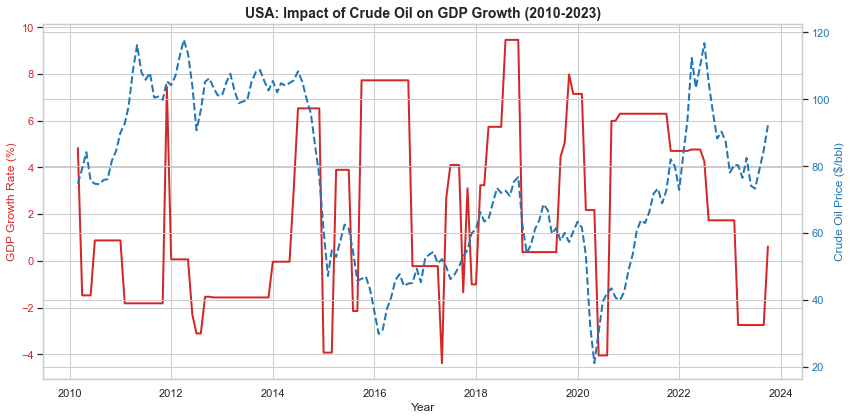

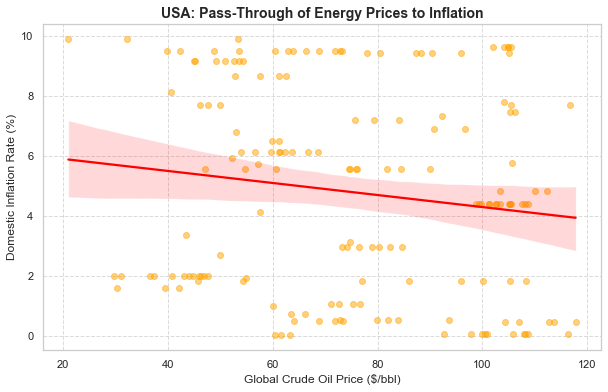

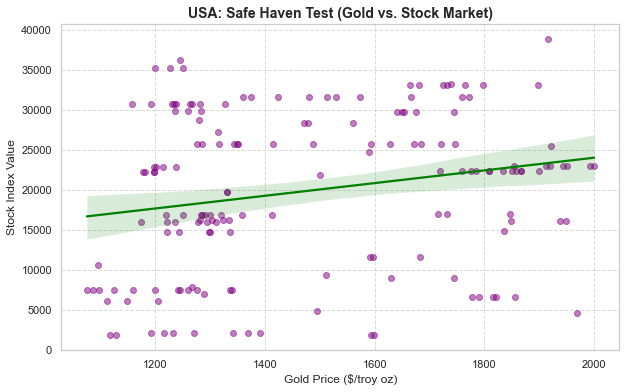

In [49]:
print("Generating Plots for USA:")
generate_country_plots(USA_ts, "USA")

In [50]:
macro_cols = ['Inflation Rate (%)', 'GDP Growth Rate (%)', 
              'Unemployment Rate (%)', 'Interest Rate (%)', 'Stock Index Value']
commodity_cols = key_commodities

correlation_matrix = USA_ts.iloc[:, 1:].corr()
macro_commodity_corr = correlation_matrix.loc[macro_cols, commodity_cols]

print("\nCorrelation Matrix:")
macro_commodity_corr.round(3)


Correlation Matrix:


,"Crude oil, average ($/bbl)","Natural gas, US ($/mmbtu)","Coal, Australian ($/mt)","Iron ore, cfr spot ($/dmtu)",Copper ($/mt),Aluminum ($/mt),Gold ($/troy oz),Silver ($/troy oz),Platinum ($/troy oz),"Wheat, US SRW ($/mt)",Soybeans ($/mt),"Cotton, A Index ($/kg)",Maize ($/mt),"Sugar, US ($/kg)",Lead ($/mt)
Inflation Rate (%),-0.144,0.175,0.166,0.082,-0.034,-0.113,0.078,-0.155,-0.152,0.033,0.138,-0.202,0.011,-0.092,-0.157
GDP Growth Rate (%),-0.322,-0.041,-0.027,-0.267,-0.186,-0.013,-0.089,-0.316,-0.394,-0.172,-0.226,-0.167,-0.278,-0.109,-0.168
Unemployment Rate (%),-0.159,-0.183,-0.146,-0.254,-0.260,-0.157,-0.212,-0.092,-0.158,-0.250,-0.335,0.084,-0.225,0.055,-0.088
Interest Rate (%),-0.017,-0.259,-0.455,-0.100,-0.255,-0.388,-0.229,-0.083,0.134,-0.179,-0.154,-0.450,-0.186,-0.551,-0.203
Stock Index Value,0.205,0.071,0.244,0.130,0.190,0.149,0.214,0.292,0.048,0.099,0.196,0.162,0.257,0.103,0.315


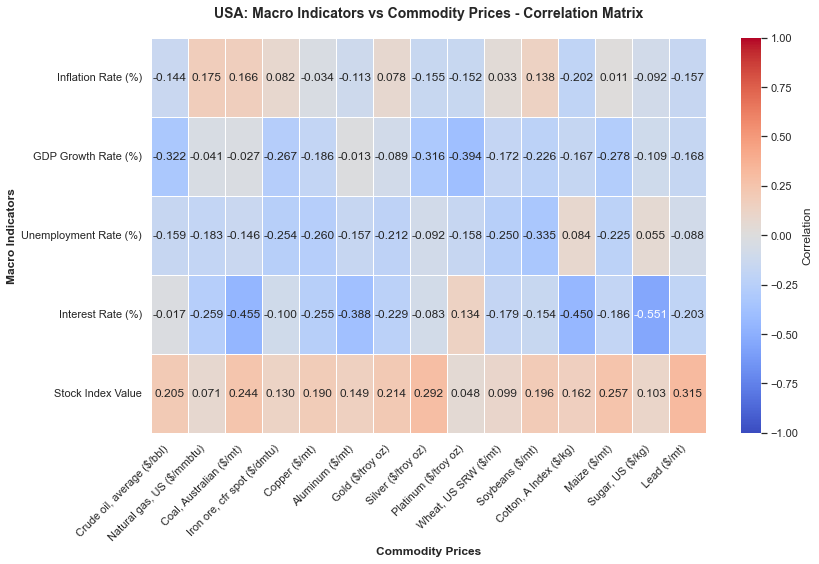

In [51]:
plt.figure(figsize=(12, 8))
sns.heatmap(macro_commodity_corr, annot=True, cmap='coolwarm', 
            center=0, vmin=-1, vmax=1, fmt='.3f', 
            linewidths=1, cbar_kws={'label': 'Correlation'})
plt.title('USA: Macro Indicators vs Commodity Prices - Correlation Matrix', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Commodity Prices', fontsize=12, fontweight='bold')
plt.ylabel('Macro Indicators', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('USA_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Regression Model

In [52]:
USA_ts = USA_ts.drop('Country', axis=1)

In [53]:
USA_ts.head(3)

,Inflation Rate (%),GDP Growth Rate (%),Unemployment Rate (%),Interest Rate (%),Stock Index Value,"Crude oil, average ($/bbl)","Natural gas, US ($/mmbtu)","Coal, Australian ($/mt)","Iron ore, cfr spot ($/dmtu)",Copper ($/mt),Aluminum ($/mt),Gold ($/troy oz),Silver ($/troy oz),Platinum ($/troy oz),"Wheat, US SRW ($/mt)",Soybeans ($/mt),"Cotton, A Index ($/kg)",Maize ($/mt),"Sugar, US ($/kg)",Lead ($/mt)
Date,,,,,,,,,,,,,,,,,,,,
2010-02-28,3.13,4.82,9.32,-0.66,10638.13,74.763016,5.3357,94.190,127.49,6848.175,2048.925,1095.413,15.8730,1520.35,191.801957,411.86,1.764798,161.80248,0.887406,2123.675
2010-03-31,7.20,-1.48,4.10,8.22,6067.71,79.297681,4.2924,94.375,139.69,7462.826,2205.630,1113.337,17.1061,1599.43,189.964774,409.36,1.891564,159.04672,0.774128,2172.087
2010-04-30,7.20,-1.48,4.10,8.22,6067.71,84.182857,4.0059,100.150,172.47,7745.075,2316.725,1148.688,18.0623,1710.50,187.760154,402.60,1.941829,157.07832,0.683842,2264.850


In [54]:
USA_ts.columns[:5]

Index(['Inflation Rate (%)', 'GDP Growth Rate (%)', 'Unemployment Rate (%)',
       'Interest Rate (%)', 'Stock Index Value'],
      dtype='object')

In [55]:
USA_ts.columns[5:]

Index(['Crude oil, average ($/bbl)', 'Natural gas, US ($/mmbtu)',
       'Coal, Australian ($/mt)', 'Iron ore, cfr spot ($/dmtu)',
       'Copper ($/mt)', 'Aluminum ($/mt)', 'Gold ($/troy oz)',
       'Silver ($/troy oz)', 'Platinum ($/troy oz)', 'Wheat, US SRW ($/mt)',
       'Soybeans ($/mt)', 'Cotton, A Index ($/kg)', 'Maize ($/mt)',
       'Sugar, US ($/kg)', 'Lead ($/mt)'],
      dtype='object')

In [56]:
def run_ols_regression(USA_ts, target, indep_cols):
    y = USA_ts[target].astype(float)
    X = USA_ts[indep_cols].astype(float)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize features using only training data
    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

    # Add intercept for statsmodels
    X_train_scaled = sm.add_constant(X_train_scaled)
    X_test_scaled = sm.add_constant(X_test_scaled)

    # Fit OLS model on training data
    model = sm.OLS(y_train, X_train_scaled)
    results = model.fit()
    print(f"\nLinear Regression: Dependent Variable = '{target}'")
    print(results.summary())

    # Predict on train and test sets
    y_train_pred = results.predict(X_train_scaled)
    y_test_pred = results.predict(X_test_scaled)

    # Compute MSE
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    print(f"Train MSE: {mse_train:.3f}")
    print(f"Test MSE: {mse_test:.3f}")
    print("Test/Train MSE ratio:", mse_test / mse_train)
    print('Ratio close to 1 is good.')

    # Evaluate model performance on test set
    test_r2 = r2_score(y_test, y_test_pred)
    print(f"Test R-squared: {test_r2:.3f}")
    
    # Plot distribution of residuals (errors)
    residuals = y_train - y_train_pred
    plt.figure(figsize=(8,5))
    plt.hist(residuals, bins=30, alpha=0.7, color='skyblue', edgecolor='black', density=True)
    
    kde = gaussian_kde(residuals)
    x_range = np.linspace(residuals.min(), residuals.max(), 100)
    plt.plot(x_range, kde(x_range), color='blue', linewidth=2)
    
    plt.title(f'Distribution of Residuals: {target}')
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.show()

In [57]:
def run_ols_metrics(USA_ts, country, target, indep_cols):
    y = USA_ts[target].astype(float)
    X = USA_ts[indep_cols].astype(float)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Standardize features using only training data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Add intercept for statsmodels
    X_train_scaled = sm.add_constant(X_train_scaled)
    X_test_scaled = sm.add_constant(X_test_scaled)
    
    # Fit OLS model on training data
    model = sm.OLS(y_train, X_train_scaled)
    results = model.fit()
    
    # Predict on train and test sets
    y_train_pred = results.predict(X_train_scaled)
    y_test_pred = results.predict(X_test_scaled)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # Return results as dict
    return {
        'country': country,
        'target_variable': target,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'mse ratio': test_mse / train_mse
    }

In [58]:
def update_model_results(model_results, new_result):
    mask = (
        (model_results['country'] == new_result['country']) &
        (model_results['target_variable'] == new_result['target_variable'])
    )
    if mask.any():
        model_results.loc[mask, ['train_r2', 'test_r2', 'train_mse', 'test_mse', 'mse ratio']] = [
            new_result['train_r2'],
            new_result['test_r2'],
            new_result['train_mse'],
            new_result['test_mse'],
            new_result['test_mse']
        ]
    else:
        # Append new row using pd.concat
        new_row_df = pd.DataFrame([new_result])
        model_results = pd.concat([model_results, new_row_df], ignore_index=True)
    return model_results

In [59]:
indep_cols = USA_ts.columns[5:]
indep_cols

Index(['Crude oil, average ($/bbl)', 'Natural gas, US ($/mmbtu)',
       'Coal, Australian ($/mt)', 'Iron ore, cfr spot ($/dmtu)',
       'Copper ($/mt)', 'Aluminum ($/mt)', 'Gold ($/troy oz)',
       'Silver ($/troy oz)', 'Platinum ($/troy oz)', 'Wheat, US SRW ($/mt)',
       'Soybeans ($/mt)', 'Cotton, A Index ($/kg)', 'Maize ($/mt)',
       'Sugar, US ($/kg)', 'Lead ($/mt)'],
      dtype='object')

In [60]:
country = 'USA'
model_results = pd.DataFrame(columns=['country', 'target_variable', 'train_r2', 'test_r2', 'train_mse', 'test_mse'])
dep_cols = USA_ts.columns[:4]
for target in dep_cols:
    result = run_ols_metrics(USA_ts, country, target, indep_cols)
    model_results = update_model_results(model_results, result)

In [61]:
model_results

,country,target_variable,train_r2,test_r2,train_mse,test_mse,mse ratio
0,USA,Inflation Rate (%),0.430114,0.390209,6.083906,7.954756,1.307508
1,USA,GDP Growth Rate (%),0.299746,0.178289,9.799212,12.991186,1.325738
2,USA,Unemployment Rate (%),0.431705,0.139276,5.567989,7.557813,1.357369
3,USA,Interest Rate (%),0.502683,0.279239,5.363055,8.397921,1.565884



Linear Regression: Dependent Variable = 'Unemployment Rate (%)'
                              OLS Regression Results                             
Dep. Variable:     Unemployment Rate (%)   R-squared:                       0.432
Model:                               OLS   Adj. R-squared:                  0.358
Method:                    Least Squares   F-statistic:                     5.824
Date:                   Sun, 23 Nov 2025   Prob (F-statistic):           8.44e-09
Time:                           02:12:10   Log-Likelihood:                -298.35
No. Observations:                    131   AIC:                             628.7
Df Residuals:                        115   BIC:                             674.7
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------

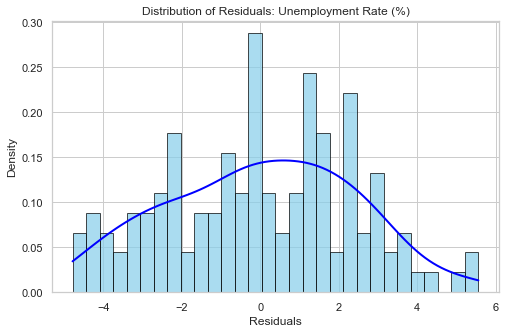

In [62]:
target = 'Unemployment Rate (%)'
run_ols_regression(USA_ts, target, indep_cols)


Linear Regression: Dependent Variable = 'Interest Rate (%)'
                            OLS Regression Results                            
Dep. Variable:      Interest Rate (%)   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     7.749
Date:                Sun, 23 Nov 2025   Prob (F-statistic):           1.02e-11
Time:                        02:12:10   Log-Likelihood:                -295.89
No. Observations:                 131   AIC:                             623.8
Df Residuals:                     115   BIC:                             669.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

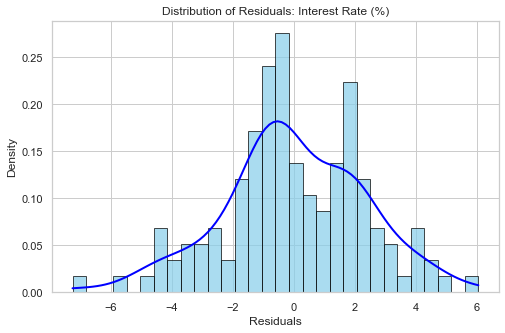

In [63]:
target = 'Interest Rate (%)'
run_ols_regression(USA_ts, target, indep_cols)


Linear Regression: Dependent Variable = 'GDP Growth Rate (%)'
                             OLS Regression Results                            
Dep. Variable:     GDP Growth Rate (%)   R-squared:                       0.300
Model:                             OLS   Adj. R-squared:                  0.208
Method:                  Least Squares   F-statistic:                     3.282
Date:                 Sun, 23 Nov 2025   Prob (F-statistic):           0.000147
Time:                         02:12:11   Log-Likelihood:                -335.37
No. Observations:                  131   AIC:                             702.7
Df Residuals:                      115   BIC:                             748.7
Df Model:                           15                                         
Covariance Type:             nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

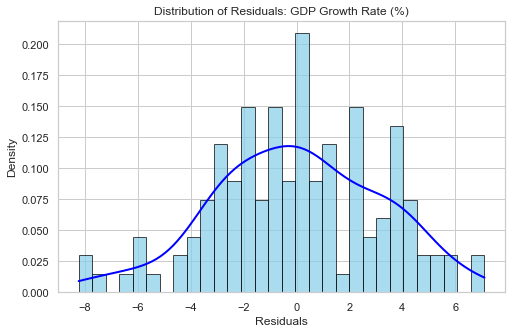

In [64]:
target = 'GDP Growth Rate (%)'
run_ols_regression(USA_ts, target, indep_cols)


Linear Regression: Dependent Variable = 'Inflation Rate (%)'
                            OLS Regression Results                            
Dep. Variable:     Inflation Rate (%)   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     5.786
Date:                Sun, 23 Nov 2025   Prob (F-statistic):           9.68e-09
Time:                        02:12:11   Log-Likelihood:                -304.15
No. Observations:                 131   AIC:                             640.3
Df Residuals:                     115   BIC:                             686.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

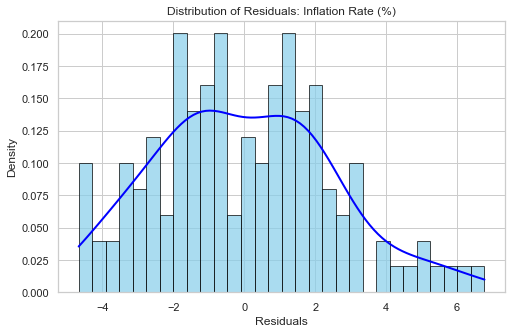

In [65]:
target = 'Inflation Rate (%)'
run_ols_regression(USA_ts, target, indep_cols)

## ARIMA modelling on GDP Growth Rate(%)

In [106]:
ts = USA_ts['GDP Growth Rate (%)']  
ts

Date
2010-02-28    4.82
2010-03-31   -1.48
2010-04-30   -1.48
2010-05-31   -1.48
2010-06-30    0.87
              ... 
2023-05-31   -2.75
2023-06-30   -2.75
2023-07-31   -2.75
2023-08-31   -2.75
2023-09-30    0.61
Freq: M, Name: GDP Growth Rate (%), Length: 164, dtype: float64

## Check Stationarity
 - ARIMA requires the series to be stationary (constant mean and variance over time).
 - Use Augmented Dickey-Fuller test

In [107]:
adf_result = adfuller(ts)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

if adf_result[1] < 0.05:
    print('\nSince the p-value < 0.05, we reject the null hypothesis of the Augmented Dickey-Fuller test, which states that the series has a unit root and is non-stationary. \nTherefore, this time series does not have a unit root and is stationary.')
else:
    print('\nSince the p-value > 0.05, we fail to reject the null hypothesis of the Augmented Dickey-Fuller test, which states that the series has a unit root and is non-stationary. \nTherefore, thia time series has a unit root and is non - stationary.')

ADF Statistic: -4.594807308315131
p-value: 0.00013204641599414365

Since the p-value < 0.05, we reject the null hypothesis of the Augmented Dickey-Fuller test, which states that the series has a unit root and is non-stationary. 
Therefore, this time series does not have a unit root and is stationary.


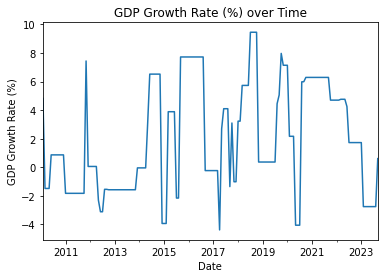

In [108]:
ts.plot(title='GDP Growth Rate (%) over Time')
plt.xlabel('Date')
plt.ylabel('GDP Growth Rate (%)')
plt.show()

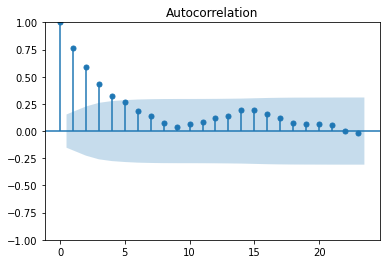

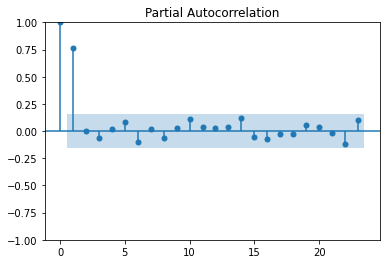

In [109]:
plot_acf(ts)
plot_pacf(ts)
plt.show()

In [110]:
model = ARIMA(ts, order=(1, 0, 0))
result = model.fit()
print(result.summary())

                                SARIMAX Results                                
Dep. Variable:     GDP Growth Rate (%)   No. Observations:                  164
Model:                  ARIMA(1, 0, 0)   Log Likelihood                -377.845
Date:                 Sat, 22 Nov 2025   AIC                            761.691
Time:                         01:37:47   BIC                            770.990
Sample:                     02-28-2010   HQIC                           765.466
                          - 09-30-2023                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0514      0.802      2.557      0.011       0.479       3.624
ar.L1          0.7673      0.075     10.183      0.000       0.620       0.915
sigma2         5.8391      0.659      8.862 

In [111]:
forecast = result.forecast(steps=12)  # Forecast next 12 steps
print(forecast)

2023-10-31    0.945406
2023-11-30    1.202763
2023-12-31    1.400232
2024-01-31    1.551751
2024-02-29    1.668011
2024-03-31    1.757217
2024-04-30    1.825665
2024-05-31    1.878185
2024-06-30    1.918484
2024-07-31    1.949405
2024-08-31    1.973131
2024-09-30    1.991336
Freq: M, Name: predicted_mean, dtype: float64


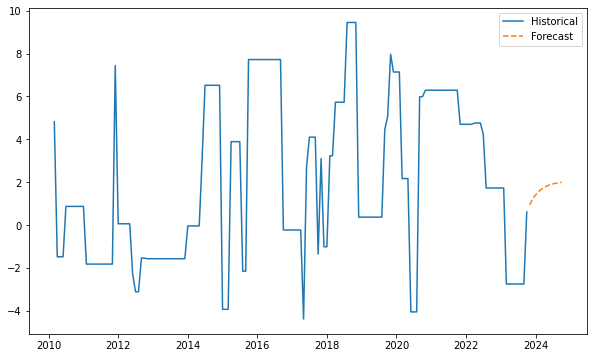

In [112]:
plt.figure(figsize=(10,6))
plt.plot(ts, label="Historical")
plt.plot(forecast, label="Forecast", linestyle="--")
plt.legend()
plt.show()